In [1]:
setwd("~/popgenomics/data/gwas_gemma/output")

In [2]:
# Load hyperparameter file
# ==============================================================================
hyp.params<-read.table("bslmm.hyp.txt",header=T)
# ==============================================================================

In [3]:
# Get mean, median, and 95% ETPI of hyperparameters
# ==============================================================================
# pve -> proportion of phenotypic variance explained by the genotypes
pve<-c("PVE", mean(hyp.params$pve),quantile(hyp.params$pve, probs=c(0.5,0.025,0.975)))

# pge -> proportion of genetic variance explained by major effect loci
pge<-c("PGE",mean(hyp.params$pge),quantile(hyp.params$pge, probs=c(0.5,0.025,0.975)))

# pi -> proportion of variants with non-zero effects
pi<-c("pi",mean(hyp.params$pi),quantile(hyp.params$pi, probs=c(0.5,0.025,0.975)))

# n.gamma -> number of variants with major effect
n.gamma<-c("n.gamma",mean(hyp.params$n_gamma),quantile(hyp.params$n_gamma, probs=c(0.5,0.025,0.975)))
# ==============================================================================

# get table of hyperparameters
# ==============================================================================
hyp.params.table<-as.data.frame(rbind(pve,pge,pi,n.gamma),row.names=F)
colnames(hyp.params.table)<-c("hyperparam", "mean","median","2.5%", "97.5%")
# show table
hyp.params.table
# write table to file
write.table(hyp.params.table, file="hyperparameters.dsv", sep="\t", quote=F)
# ==============================================================================

hyperparam mean              median       2.5%           97.5%        
1 PVE        0.50758534164     0.49616535   0.3290844075   0.753359795  
2 PGE        0.70427977221     0.70412075   0.4118065175   0.9789640325 
3 pi         1.29564889986e-05 9.376132e-06 3.25441665e-06 4.3316011e-05
4 n.gamma    4.574             4            1              14

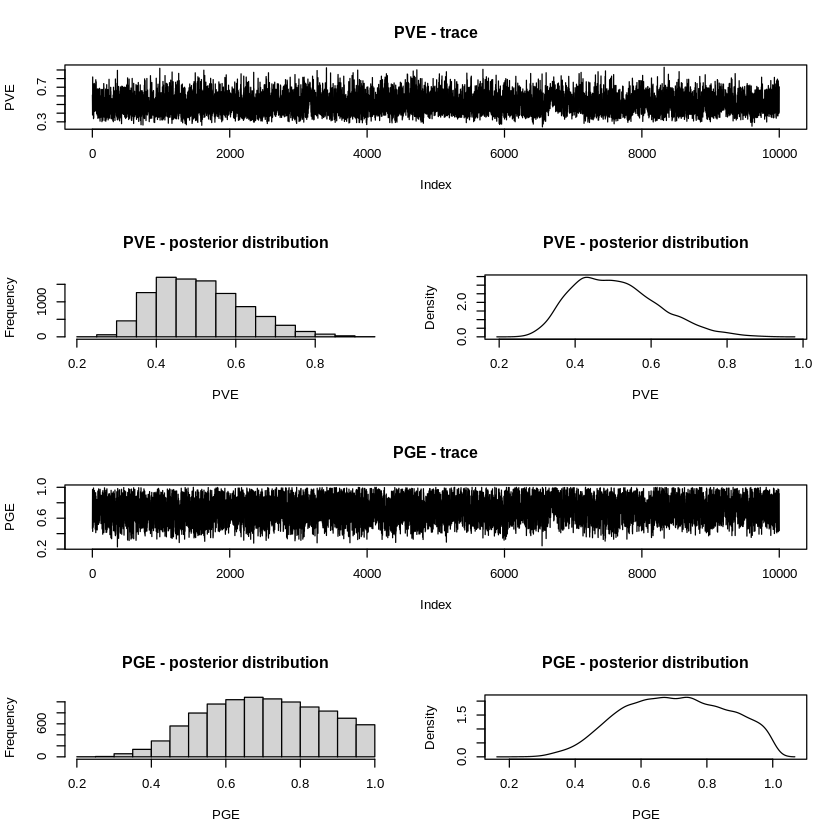

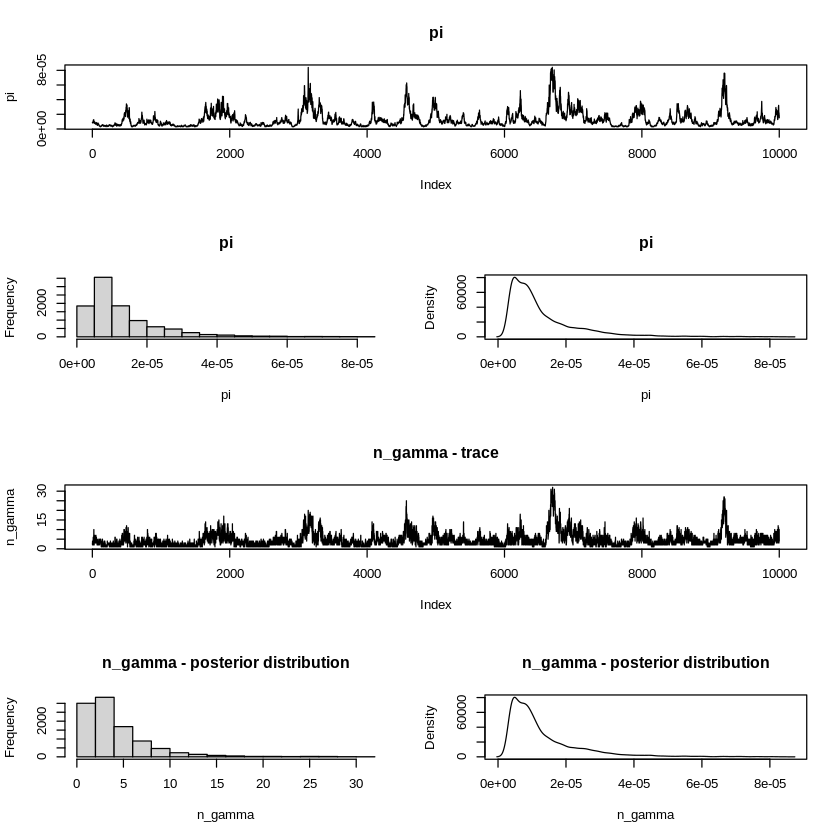

In [4]:
# plot traces and distributions of hyperparameters
# ==============================================================================
layout(matrix(c(1,1,2,3,4,4,5,6), 4, 2, byrow = TRUE))

# PVE
# ------------------------------------------------------------------------------
plot(hyp.params$pve, type="l", ylab="PVE", main="PVE - trace")
hist(hyp.params$pve, main="PVE - posterior distribution", xlab="PVE")
plot(density(hyp.params$pve), main="PVE - posterior distribution", xlab="PVE")
# ------------------------------------------------------------------------------

# PGE
# ------------------------------------------------------------------------------
plot(hyp.params$pge, type="l", ylab="PGE", main="PGE - trace")
hist(hyp.params$pge, main="PGE - posterior distribution", xlab="PGE")
plot(density(hyp.params$pge), main="PGE - posterior distribution", xlab="PGE")
# ------------------------------------------------------------------------------

# pi
# ------------------------------------------------------------------------------
plot(hyp.params$pi, type="l", ylab="pi", main="pi")
hist(hyp.params$pi, main="pi", xlab="pi")
plot(density(hyp.params$pi), main="pi", xlab="pi")
# ------------------------------------------------------------------------------

# No gamma
# ------------------------------------------------------------------------------
plot(hyp.params$n_gamma, type="l", ylab="n_gamma", main="n_gamma - trace")
hist(hyp.params$n_gamma, main="n_gamma - posterior distribution", xlab="n_gamma")
plot(density(hyp.params$pi), main="n_gamma - posterior distribution", xlab="n_gamma")
# ------------------------------------------------------------------------------
# ==============================================================================

In [5]:
# library to speed up loading of big tables
library(data.table)

# Load parameters output
# ==============================================================================
params<-fread("bslmm.param.txt",header=T,sep="\t", data.table=F)
# ==============================================================================

In [6]:
# Get variants with sparse effect size on phenotypes 
# ==============================================================================
# add sparse effect size (= beta * gamma) to data frame
params["eff"]<-abs(params$beta*params$gamma)

In [7]:
# get variants with effect size > 0
params.effects<-params[params$eff>0,]

# show number of variants with measurable effect
nrow(params.effects)

# sort by descending effect size
params.effects.sort<-params.effects[order(-params.effects$eff),]

# show top 10 variants with highest effect
head(params.effects.sort, 10) 

# variants with the highest sparse effects
# ------------------------------------------------------------------------------
# top 1% variants (above 99% quantile)
top1<-params.effects.sort[params.effects.sort$eff>quantile(params.effects.sort$eff,0.99),]
# top 0.1% variants (above 99.9% quantile)
top01<-params.effects.sort[params.effects.sort$eff>quantile(params.effects.sort$eff,0.999),]
# top 0.01% variants (above 99.99% quantile)
top001<-params.effects.sort[params.effects.sort$eff>quantile(params.effects.sort$eff,0.9999),]
# ------------------------------------------------------------------------------

# write tables
write.table(top1, file="top1eff.dsv", quote=F, row.names=F, sep="\t")
write.table(top01, file="top0.1eff.dsv", quote=F, row.names=F, sep="\t")
write.table(top001, file="top0.01eff.dsv", quote=F, row.names=F, sep="\t")

[1] 15595

chr rs                        ps n_miss alpha         beta       gamma 
4929   -9  lg8_ord45_scaf1036-131573 -9 0      -1.229901e-05 -1.2065980 0.5364
4943   -9  lg8_ord45_scaf1036-131605 -9 0      -1.096165e-05 -1.0375980 0.4636
341474 -9  lg8_ord55_scaf1512-149001 -9 0      -6.640361e-05 -0.7905428 0.5635
330495 -9  lg8_ord66_scaf318-448145  -9 0      -1.133074e-04 -0.6136137 0.0566
315197 -9  lgNA_ordNA_scaf784-237602 -9 0       1.004314e-04  0.7119540 0.0378
5105   -9  lg3_ord81_scaf488-29866   -9 0       7.241678e-05  0.9273204 0.0232
183101 -9  lgNA_ordNA_scaf154-274617 -9 0       5.164412e-05  1.1116970 0.0157
138641 -9  lg6_ord32_scaf531-110990  -9 0       6.656697e-05  0.9619961 0.0169
138636 -9  lg6_ord32_scaf531-110989  -9 0       6.606357e-05  0.9763403 0.0144
20435  -9  lg3_ord28_scaf970-18573   -9 0       5.868428e-05  1.1262150 0.0109
       eff       
4929   0.64721917
4943   0.48103043
341474 0.44547087
330495 0.03473054
315197 0.02691186
5105   0.02151383
183101 0.01745364
138641 0.01625773
138636 0.01405930
20435  0.01227574

In [8]:
# ==============================================================================
# Get variants with high Posterior Inclusion Probability (PIP) == gamma
# ==============================================================================
# PIP is the frequency a variant is estimated to have a sparse effect in the MCMC

# sort variants by descending PIP
params.pipsort<-params[order(-params$gamma),]

# Show top 10 variants with highest PIP
head(params.pipsort,10)

# sets of variants above a certain threshold
# variants with effect in 1% MCMC samples or more
pip01<-params.pipsort[params.pipsort$gamma>=0.01,]
# variants with effect in 10% MCMC samples or more
pip10<-params.pipsort[params.pipsort$gamma>=0.10,]
# variants with effect in 25% MCMC samples or more
pip25<-params.pipsort[params.pipsort$gamma>=0.25,]
# variants with effect in 50% MCMC samples or more
pip50<-params.pipsort[params.pipsort$gamma>=0.50,]

# write tables
write.table(pip01, file="pip01.dsv", quote=F, row.names=F, sep="\t")
write.table(pip10, file="pip10.dsv", quote=F, row.names=F, sep="\t")
write.table(pip25, file="pip25.dsv", quote=F, row.names=F, sep="\t")
write.table(pip50, file="pip50.dsv", quote=F, row.names=F, sep="\t")

chr rs                        ps n_miss alpha         beta       gamma 
341474 -9  lg8_ord55_scaf1512-149001 -9 0      -6.640361e-05 -0.7905428 0.5635
4929   -9  lg8_ord45_scaf1036-131573 -9 0      -1.229901e-05 -1.2065980 0.5364
4943   -9  lg8_ord45_scaf1036-131605 -9 0      -1.096165e-05 -1.0375980 0.4636
330495 -9  lg8_ord66_scaf318-448145  -9 0      -1.133074e-04 -0.6136137 0.0566
315197 -9  lgNA_ordNA_scaf784-237602 -9 0       1.004314e-04  0.7119540 0.0378
107712 -9  lg1_ord96_scaf190-725578  -9 0      -2.183769e-04 -0.3418733 0.0326
5105   -9  lg3_ord81_scaf488-29866   -9 0       7.241678e-05  0.9273204 0.0232
298599 -9  lg10_ord64_scaf380-30883  -9 0      -2.363161e-04 -0.3245005 0.0180
50207  -9  lg8_ord60_scaf2482-78371  -9 0       1.514078e-04  0.4569336 0.0174
138641 -9  lg6_ord32_scaf531-110990  -9 0       6.656697e-05  0.9619961 0.0169
       eff        
341474 0.445470868
4929   0.647219167
4943   0.481030433
330495 0.034730535
315197 0.026911861
107712 0.011145070
5105   0.021513833
298599 0.005841009
50207  0.007950645
138641 0.016257734

Warning message in order(as.numeric(params$chr), params$rs):
“NAs introduced by coercion”
Warning message in sort(as.numeric(unique(chr))):
“NAs introduced by coercion”


CH:  1 
CHR:  1  variants:  18677 (total:  18678 )
CH:  2 
CHR:  2  variants:  9972 (total:  28650 )
CH:  3 
CHR:  3  variants:  35266 (total:  63916 )
CH:  4 
CHR:  4  variants:  55579 (total:  119495 )
CH:  5 
CHR:  5  variants:  4580 (total:  124075 )
CH:  6 
CHR:  6  variants:  27273 (total:  151348 )
CH:  7 
CHR:  7  variants:  13181 (total:  164529 )
CH:  8 
CHR:  8  variants:  17618 (total:  182147 )
CH:  9 
CHR:  9  variants:  15931 (total:  198078 )
CH:  10 
CHR:  10  variants:  19636 (total:  217714 )
CH:  11 
CHR:  11  variants:  17658 (total:  235372 )
CH:  12 
CHR:  12  variants:  13131 (total:  248503 )
CH:  13 
CHR:  13  variants:  19527 (total:  268030 )


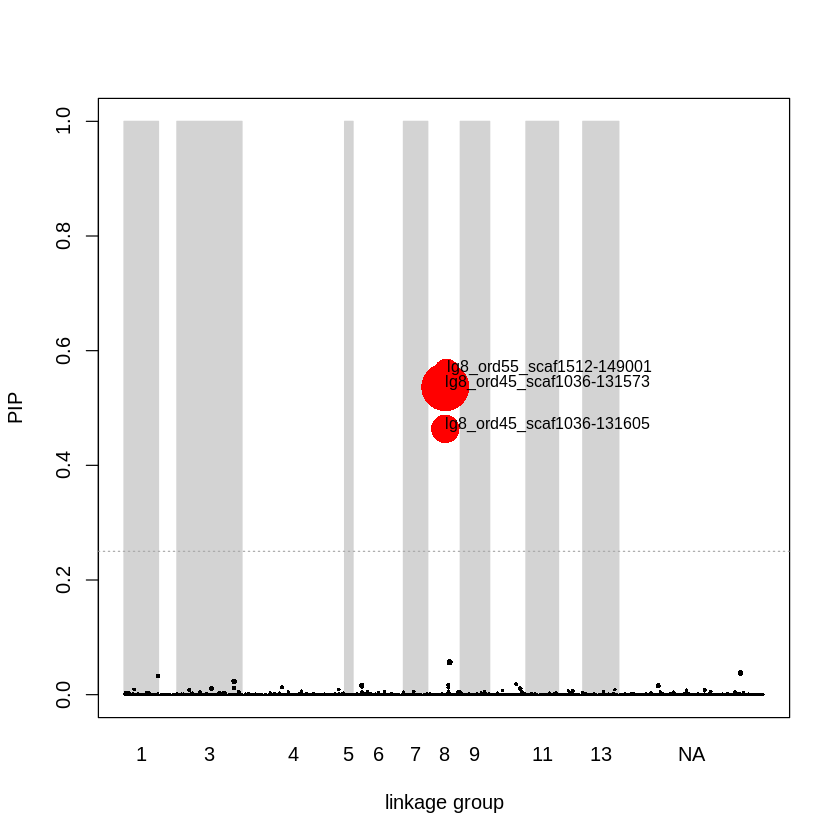

In [9]:
# ==============================================================================
# plot variants PIPs across linkage groups/chromosomes
# ==============================================================================
# Prepare data
# ------------------------------------------------------------------------------
# add linkage group column (chr)
chr<-gsub("lg|_.+","",params$rs)
params["chr"]<-chr

# sort by linkage group and position
params.sort<-params[order(as.numeric(params$chr), params$rs),]

# get list of linkage groups/chromosomes
chrs<-sort(as.numeric(unique(chr)))
# ------------------------------------------------------------------------------

# Plot figure
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
# set up empty plot
plot(-1,-1,xlim=c(0,nrow(params.sort)),ylim=c(0,1),ylab="PIP",xlab="linkage group", xaxt="n")


# plot grey bands for chromosome/linkage groups
# ------------------------------------------------------------------------------
start<-1
lab.pos<-vector()
for (ch in chrs){
  size<-nrow(params.sort[params.sort$chr==ch,])
  cat ("CH: ", ch, "\n")
  colour<-"light grey"
  if (ch%%2 > 0){
    polygon(c(start,start,start+size,start+size,start), c(0,1,1,0,0), col=colour, border=colour)
  }
  cat("CHR: ", ch, " variants: ", size, "(total: ", (start+size), ")\n")
  txtpos<-start+size/2
  lab.pos<-c(lab.pos, txtpos)

  start<-start+size
}
# Add variants outside linkage groups
chrs<-c(chrs,"NA")
size<-nrow(params.sort[params.sort$chr=="NA",])
lab.pos<-c(lab.pos, start+size/2)
# ------------------------------------------------------------------------------

# Add x axis labels
axis(side=1,at=lab.pos,labels=chrs,tick=F)

# plot PIP for all variants
# ------------------------------------------------------------------------------
# rank of variants across linkage groups
x<-seq(1,length(params.sort$gamma),1)
# PIP 
y<-params.sort$gamma
# sparse effect size, used for dot size
z<-params.sort$eff
# log-transform to enhance visibility
z[z==0]<-0.00000000001
z<-1/abs(log(z))
# plot
symbols(x,y,circles=z, bg="black",inches=1/5, fg=NULL,add=T)
# ------------------------------------------------------------------------------

# highlight high PIP variants (PIP>=0.25)
# ------------------------------------------------------------------------------
# plot threshold line
abline(h=0.25,lty=3,col="dark grey")
# rank of high PIP variants across linkage groups
x<-match(params.sort$gamma[params.sort$gamma>=0.25],params.sort$gamma)
# PIP
y<-params.sort$gamma[params.sort$gamma>=0.25]
# sparse effect size, used for dot size
z<-params.sort$eff[params.sort$gamma>=0.25]
z<-1/abs(log(z))

symbols(x,y,circles=z, bg="red",inches=1/5,fg=NULL,add=T)
# ------------------------------------------------------------------------------

# add label high PIP variants
text(x,y,labels=params.sort$rs[params.sort$gamma>=0.25], adj=c(0,0), cex=0.8)
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------

# ==============================================================================